##### Data Background and Columns

This dataset contains sentiment analysis data gathered from Twitter. We scraped the data using sources such as **Al Jazeera, CNN, BBC News, The Federalist,** and a **Kaggle dataset** containing tweets related to the **Israel-Palestine** conflict. Due to API restrictions,**10% of our data is fabricated** to explore its impact on the model's performance and observe any resulting variations.

##### The Dataset

- **Headline:** The title or main heading of the news article or tweet.
- **Description:** A brief summary or explanation of the content.
- **Date:** The publication date of the news article or tweet.
- **Source:** The platform or media outlet where the news or tweet originated.
- **Headline_Tokens:** A list of individual words (tokens) extracted from the headline.
- **Description_Token:** A list of individual words (tokens) extracted from the description
##### Objective

Our goal is to classify and categorize the **dataset's sentiment (positive, negative, or neutral)**. We will then analyze and interpret the results.

## Import and Download libraries
Import necessary libraries like pandas,re(regular expressions), NLTK (for text preprocessing), Scikit-learn (for ML models).
Download NLTK resources like vader_lexicon, punkt, wordnet, and stopwords for sentiment analysis and preprocessing.

In [1]:
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Download necessary NLTK packages
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Steps for loading and prepocessing
- Loading data, preprocessing text (cleaning, lemmatization, stop word removal)
- Vectorizing it using TF-IDF to prepare the data for machine learning tasks

In [5]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
df = pd.read_csv("transformed_news_data.csv")
df['text'] = df['Description'] 
df['text'] = df['text'].astype(str).fillna('')
def lemmatize_and_remove_stopwords(text):
    """Function to lemmatize text and remove stop words."""
    # Tokenize the text
    tokens = word_tokenize(text)
    # Lemmatize and remove stop words
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)
    
def clean_text(text):
    """Function to clean and prepare text for vectorization."""
    if not isinstance(text, str):
        text = str(text)
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[a-zA-Z]*px', '', text)  # Remove CSS-like "1024px", "300px" patterns
    text = re.sub(r'http\S+|www\S+|https\S+|@\S+', '', text)  # Remove URLs and mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only alphabetic characters
    text = re.sub(r'(.)\1{4,}', r'\1', text)  # 4 or more repeated characters reduced
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()
    return text

df['text_lemmatized'] = df['text'].apply(lemmatize_and_remove_stopwords)
df['text_cleaned'] = df['text'].fillna('').apply(lemmatize_and_remove_stopwords).apply(clean_text)


## Steps for Vectorization
- **TfidfVectorizer:** how frequently a word occurs in a document but also how unique it is across the entire dataset.
- **ngram_range=(1, 2):** This specifies that both unigrams (individual words) and bigrams (pairs of consecutive words) will be included in the vectorization process.
- **min_df=5:** This ensures that only words or n-grams that appear in at least 5 documents are included.
- **stop_words='english':** This removes common stop words in English.

In [7]:
# Vectorization using TF-IDF
#TF-IDF Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=5, stop_words='english')

##Fit and Transform the Cleaned Text
X_vectorized = vectorizer.fit_transform(df['text_cleaned'])

### Steps for VADER
- Initialized and Prepared the VADER sentiment analyzer.
- Created a function to compute sentiment based on the VADER compound score.
- Applied the function to classify sentiment into positive, neutral, and negative labels.

In [9]:
nltk.download('vader_lexicon')
df['text'] = df['Description'] 
sid = SentimentIntensityAnalyzer()

df['text'] = df['text'].astype(str).fillna('')

def get_vader_sentiment(text):
    sentiment_dict = sid.polarity_scores(text)
    # Classify based on compound score: Positive (1), Neutral (0), Negative (-1)
    if sentiment_dict['compound'] >= 0.05:
        return 1  # Positive
    elif sentiment_dict['compound'] <= -0.05:
        return -1  # Negative
    else:
        return 0  # Neutral

# Step 4: Apply the sentiment function to the 'text' column
df['sentiment_label'] = df['text'].apply(get_vader_sentiment)

# Step 5: Now you can use the labeled sentiment column
df[['text', 'sentiment_label']].head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,text,sentiment_label
0,gaza jour­nal­ists be­ing killed un­prece­dent...,-1
1,hun­dreds pales­tini­ans forced evac­u­ate bu­...,-1
2,un se­cu­ri­ty coun­cil pass­es res­o­lu­tion ...,1
3,white house says tehran pro­vid­ing yemeni reb...,-1
4,wa­tered-down res­o­lu­tion boost­ing aid gaza...,0


## Count for various sentiment labels

In [11]:
df['sentiment_label'].value_counts()

sentiment_label
-1    3862
 0    2349
 1    1177
Name: count, dtype: int64

## Plot for sentiment label count

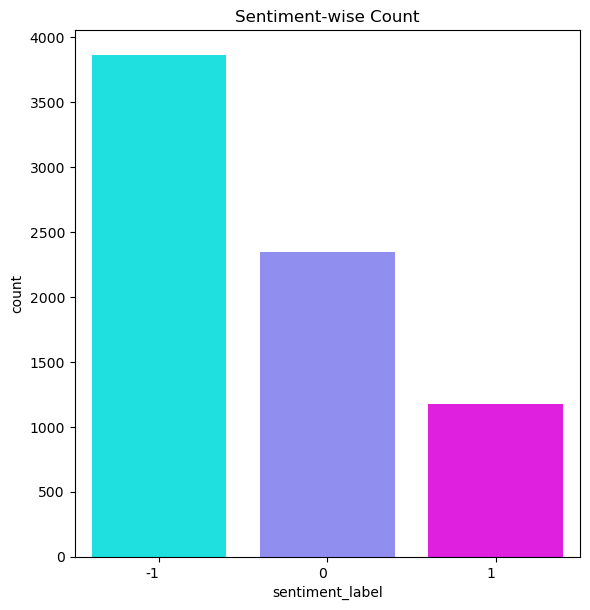

In [13]:
plt.figure(figsize=(6,6))
ax = sns.countplot(
    x="sentiment_label", 
    data=df,
    order=df['sentiment_label'].value_counts().index,
    hue="sentiment_label",
    palette="cool",
    legend=False
)
plt.xticks( ha="right")
plt.tight_layout()
plt.title("Sentiment-wise Count")
plt.show()


### Steps for SMOTE and Vectorization
- Defined the features (X) and target labels (Y)
- Handle Class Imbalance Using SMOTE
- Upsampled the positive sentiment class to match the number of negative samples for class balance
- Combine Upsampled Data
- Re-vectorize After Balancing

In [15]:
X = X_vectorized
Y = df['sentiment_label']  # Sentiment: -1 for negative, 0 for neutral, 1 for positive

# Separate positive, neutral, and negative samples
positive_samples = df[df['sentiment_label'] == 1]
neutral_samples = df[df['sentiment_label'] == 0]
negative_samples = df[df['sentiment_label'] == -1]

# Upsample positive sentiment class
positive_samples_upsampled = positive_samples.sample(n=len(negative_samples), replace=True, random_state=42)

# Combine back the upsampled dataset
df_balanced = pd.concat([positive_samples_upsampled, neutral_samples, negative_samples])

# Re-vectorize after balancing
X_balanced = vectorizer.fit_transform(df_balanced['text_cleaned'])
Y_balanced = df_balanced['sentiment_label']

### Steps for Splitting of data sets
Split data into training and testing sets

In [17]:
# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, Y_balanced, test_size=0.3, random_state=42)

## Model 1: Naive Bayes

## Steps for Naive Bayes Classifier and GridSearchCV
- Initialized the Naive Bayes classifier (MultinomialNB()).
- Defined the parameter grid (alpha values) for tuning with grid search with 5-fold cross-validation to find the best alpha.
- Evaluated the model's performance, displaying the best alpha value, accuracy, and classification report.

In [19]:
nb_classifier = MultinomialNB()
param_grid_nb = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0]}  # Test different alpha values

# Perform Grid Search with Cross-Validation for Naive Bayes
grid_search_nb = GridSearchCV(nb_classifier, param_grid_nb, cv=5, scoring='accuracy')  # 5-fold cross-validation
grid_search_nb.fit(X_train, y_train)

# Get the best Naive Bayes model
best_nb_model = grid_search_nb.best_estimator_

# Make predictions on the test set using the best Naive Bayes model
y_pred_nb = best_nb_model.predict(X_test)
# Step 8: Display results for Naive Bayes with GridSearchCV
print(f"Best alpha parameter for Naive Bayes: {grid_search_nb.best_params_}")  # Display the best alpha parameter

# Calculate accuracy for the best Naive Bayes model
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")

# Generate classification report for Naive Bayes model
nb_classification_report = classification_report(y_test, y_pred_nb)
print("Naive Bayes Classification Report:")
print(nb_classification_report)


Best alpha parameter for Naive Bayes: {'alpha': 0.1}
Naive Bayes Accuracy: 0.75
Naive Bayes Classification Report:
              precision    recall  f1-score   support

          -1       0.68      0.85      0.75      1119
           0       0.69      0.47      0.56       729
           1       0.86      0.82      0.84      1174

    accuracy                           0.75      3022
   macro avg       0.74      0.71      0.72      3022
weighted avg       0.75      0.75      0.74      3022



## Steps for inspect important features (words or n-grams)
- Extracted the feature names (words or n-grams) from the vectorized dataset.
- Retrieved the log probabilities
- Sorted the features
- Extracted and displayed the top 20 features

In [21]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=5, stop_words='english')  # Example vectorizer settings
X_vectorized = vectorizer.fit_transform(df['text_cleaned'])  # Fitting vectorizer to cleaned text data
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
log_probabilities = nb_classifier.feature_log_prob_
feature_names = vectorizer.get_feature_names_out()
feature_log_prob_pairs = zip(feature_names, log_probabilities[1])
sorted_features = sorted(feature_log_prob_pairs, key=lambda x: x[1], reverse=True)
top_positive_features = sorted_features[:20]
print("Top positive features:")
for feature, score in top_positive_features:
    print(f"{feature}: {score}")

Top positive features:
refuse: -5.804218189717053
shore: -6.547697018349957
commission: -6.695722343021653
sentence: -6.771384111863943
international criminal: -6.775851247183052
prevent: -6.871398773182811
chuck: -7.015369462636709
fled: -7.016850513852852
appeal: -7.071268099768059
free speech: -7.073679926528138
guterres: -7.086626299207984
tell story: -7.139437191958509
chest: -7.231560552561955
dana bash: -7.232182173777179
talking: -7.25237616950402
arrests: -7.253924908946294
demonstrate: -7.257338240704293
evil: -7.259345838937524
main developments: -7.261991151535792
arriving: -7.279815648667461


## Plot for Top Positive Features by Log Probability

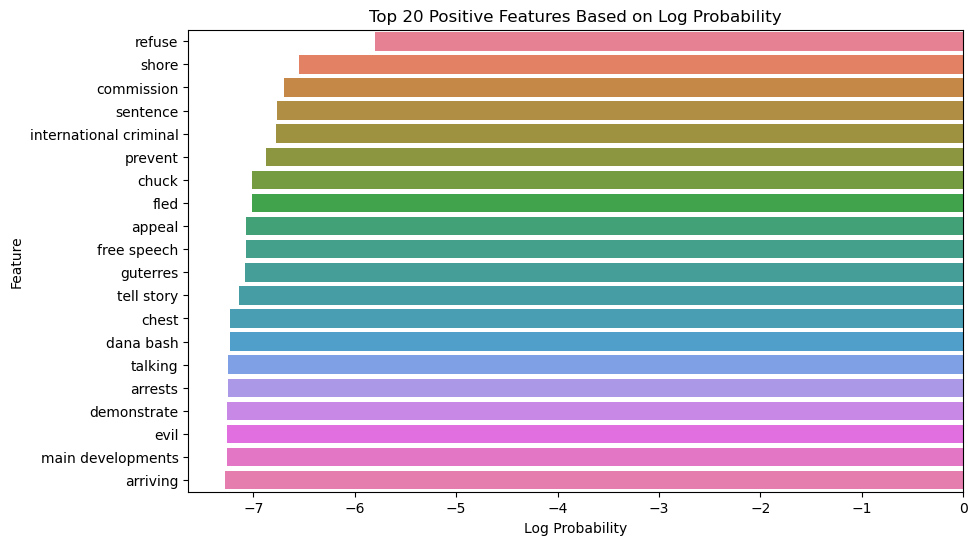

In [23]:
df_top_features = pd.DataFrame(top_positive_features, columns=['Feature', 'Log Probability'])

# Create a bar plot for the top positive features
plt.figure(figsize=(10, 6))
sns.barplot(x='Log Probability', y='Feature', data=df_top_features, hue='Feature', dodge=False, legend=False)

# Add plot details
plt.title('Top 20 Positive Features Based on Log Probability')
plt.xlabel('Log Probability')
plt.ylabel('Feature')

# Show the plot
plt.show()

## Model 2: Support Vector Classifier

Support Vector Classifier (SVC) is a classification algorithm based on Support Vector Machines (SVM). It's useful for sentiment analysis because of its common when dealing with text data (e.g., using TF-IDF or bag-of-words).

**Key reasons to use SVC**

- Effective in High-Dimensional Spaces
- Handles Non-Linearity
- Robustness

In [25]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train, y_train)
svc_prediction=svc_model.predict(X_test)
svc_score=svc_model.score(X_test, y_test)
# Model fit and accuracy
print('Accuracy of Support Vector Classifier on training set: {:.2f}'.format(svc_model.score(X_train, y_train)))
print('Accuracy of Support Vector Classifier on test set:     {:.2f}'.format(svc_model.score(X_test, y_test)))
#Mean Squared Error
svc_mse = mean_squared_error(y_test, svc_prediction)
print(svc_mse)

Accuracy of Support Vector Classifier on training set: 1.00
Accuracy of Support Vector Classifier on test set:     0.83
0.2700198544010589


In [27]:
accuracy = accuracy_score(y_test, svc_prediction)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, svc_prediction))

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

          -1       0.78      0.87      0.82      1119
           0       0.77      0.64      0.70       729
           1       0.93      0.92      0.92      1174

    accuracy                           0.83      3022
   macro avg       0.83      0.81      0.82      3022
weighted avg       0.83      0.83      0.83      3022



In [29]:
#Confusion Matrix
svc_cm = confusion_matrix(y_test, svc_prediction, labels=[-1, 0, 1])
svc_cm

array([[ 971,  103,   45],
       [ 219,  470,   40],
       [  60,   34, 1080]], dtype=int64)

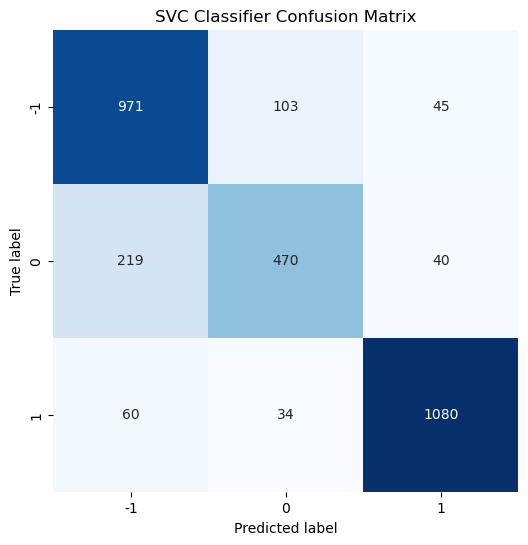

In [31]:
# Plot heatmap with correct labels
plt.figure(figsize=(6,6))
plt.title("SVC Classifier Confusion Matrix")
sns.heatmap(svc_cm, annot=True, cmap="Blues", fmt="d", cbar=False, xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### Model 3: K-Nearest Neighbors (KNN)

In [33]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KN = OneVsRestClassifier(KNeighborsClassifier())
classifier_KN.fit(X_train, y_train)
knn_prediction = classifier_KN.predict(X_test)
knn_score = classifier_KN.score(X_test,y_test)
#Model fit and accuracy
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(classifier_KN.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(classifier_KN.score(X_test, y_test)))
#Mean Squared Error

knn_mse = mean_squared_error(y_test, knn_prediction)
print(knn_mse)

Accuracy of KNeighbors Classifier on training set: 0.51
Accuracy of KNeighbors Classifier on test set:     0.42
0.5903375248180013


In [37]:
accuracy = accuracy_score(y_test, knn_prediction)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, knn_prediction))

Accuracy: 0.42
Classification Report:
              precision    recall  f1-score   support

          -1       0.79      0.03      0.06      1119
           0       0.29      0.98      0.45       729
           1       0.98      0.44      0.61      1174

    accuracy                           0.42      3022
   macro avg       0.69      0.48      0.37      3022
weighted avg       0.74      0.42      0.36      3022



In [41]:
# Generate confusion matrix with specified labels
knn_cm = confusion_matrix(y_test, knn_prediction, labels=[-1, 0, 1])
knn_cm

array([[  33, 1081,    5],
       [   5,  718,    6],
       [   4,  656,  514]], dtype=int64)

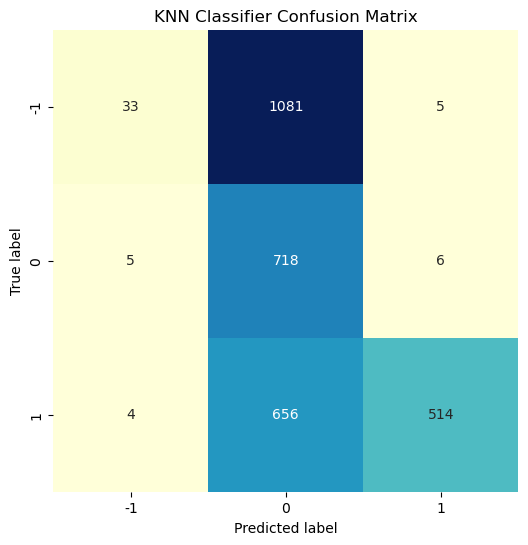

In [43]:
# Plot heatmap with correct labels
plt.figure(figsize=(6,6))
plt.title("KNN Classifier Confusion Matrix")
sns.heatmap(knn_cm, annot=True, cmap="YlGnBu", fmt="d", cbar=False, xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


### Model 4: Decision Tree

A Decision Tree (DT) classifier works by splitting the data into subsets based on the most informative features. It creates a tree-like structure where each node represents a decision based on a feature, and the leaves represent the final output or classification.

**Key reasons to use a Decision Tree**

- Interpretability
- No Feature Scaling Needed: Unlike some algorithms (e.g., SVM, KNN), Decision Trees don't require scaling of features
- Handles Non-Linear Relationships: Decision Trees can handle both linear and non-linear relationships well by splitting the data based on feature thresholds.
- Overfitting Tendency

In [45]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
DT_prediction = classifier_DT.predict(X_test)
DT_score = classifier_DT.score(X_test,y_test)
# Model fit and accuracy
print('Accuracy of DT Classifier on training set: {:.2f}'.format(classifier_DT.score(X_train, y_train)))
print('Accuracy of DT Classifier on test set:     {:.2f}'.format(classifier_DT.score(X_test, y_test)))
#Mean Squared Error
DT_mse = mean_squared_error(y_test, DT_prediction)
print(DT_mse)

Accuracy of DT Classifier on training set: 1.00
Accuracy of DT Classifier on test set:     0.76
0.4010589013898081


In [47]:
accuracy = accuracy_score(y_test, DT_prediction)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, DT_prediction))

Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

          -1       0.76      0.67      0.71      1119
           0       0.62      0.62      0.62       729
           1       0.84      0.94      0.89      1174

    accuracy                           0.76      3022
   macro avg       0.74      0.74      0.74      3022
weighted avg       0.76      0.76      0.76      3022



In [49]:
#Confusion Matrix
DT_cm = confusion_matrix(y_test, DT_prediction, labels=[-1, 0, 1])
DT_cm

array([[ 749,  242,  128],
       [ 196,  454,   79],
       [  36,   39, 1099]], dtype=int64)

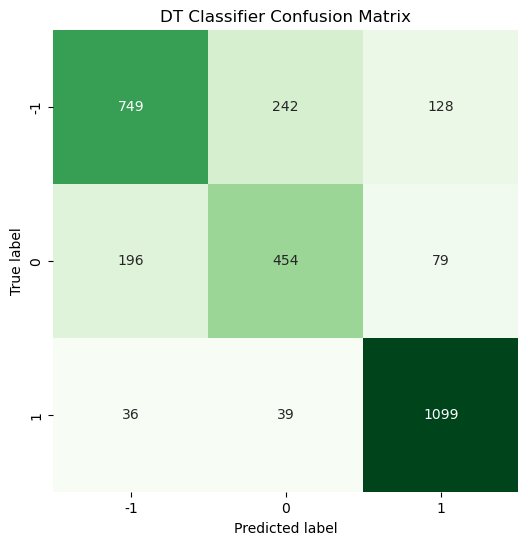

In [51]:
# Plot heatmap with correct labels
plt.figure(figsize=(6,6))
plt.title("DT Classifier Confusion Matrix")
sns.heatmap(DT_cm, annot=True, cmap="Greens", fmt="d", cbar=False, xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [53]:
print("The dataset has", df.shape[0], "observations, and", df.shape[1], "variables") 
print("We have", df['sentiment_label'].shape[0], "records for target")
features = df.columns.drop('sentiment_label')
print("The variables are", list(features)) 
print("The targets are", df['sentiment_label'].unique()) 

The dataset has 7388 observations, and 10 variables
We have 7388 records for target
The variables are ['Headline', 'Description', 'Date', 'Source', 'Headline_Tokens', 'Description_Tokens', 'text', 'text_lemmatized', 'text_cleaned']
The targets are [-1  1  0]


In [55]:
from sklearn.tree import DecisionTreeClassifier

dt_full= DecisionTreeClassifier(random_state=0)
dt_full.fit(X_train,y_train)
dt_full.score(X_test,y_test), dt_full.score(X_train,y_train)

(0.771012574454004, 1.0)

In [57]:
# Let maximum depth be 3

from sklearn.tree import DecisionTreeClassifier

# A Basic Tree
dt_3= DecisionTreeClassifier(max_depth = 3, random_state = 0 )
dt_3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [59]:
dt_3.score(X_train,y_train), dt_3.score(X_test,y_test)

(0.5348177563466175, 0.5185307743216413)

In [61]:
# GridSearch + CV
from sklearn.model_selection import GridSearchCV
#random_state throughout the process it is fixed through the tuning process
#opt_tree = DecisionTreeClassifier(random_state = 0,criterion='entropy')

opt_tree = DecisionTreeClassifier(random_state = 0)
#tuning multiple hyperparameters
dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11),
             'max_leaf_nodes':    range(2,11)   }

grid_tree = GridSearchCV(opt_tree, dt_params)
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

In [63]:
grid_tree.best_params_

{'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_split': 2}

In [65]:
from sklearn import tree
print(tree.export_text(grid_tree.best_estimator_))

|--- feature_8819 <= 0.10
|   |--- feature_4670 <= 0.10
|   |   |--- feature_4339 <= 0.09
|   |   |   |--- feature_4191 <= 0.09
|   |   |   |   |--- feature_636 <= 0.11
|   |   |   |   |   |--- feature_7244 <= 0.12
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_7244 >  0.12
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_636 >  0.11
|   |   |   |   |   |--- class: -1
|   |   |   |--- feature_4191 >  0.09
|   |   |   |   |--- feature_8574 <= 0.04
|   |   |   |   |   |--- feature_636 <= 0.11
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_636 >  0.11
|   |   |   |   |   |   |--- class: -1
|   |   |   |   |--- feature_8574 >  0.04
|   |   |   |   |   |--- class: 1
|   |   |--- feature_4339 >  0.09
|   |   |   |--- feature_4691 <= 0.08
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4691 >  0.08
|   |   |   |   |--- class: -1
|   |--- feature_4670 >  0.10
|   |   |--- class: -1
|--- feature_8819 >  0.10
|   |--- class

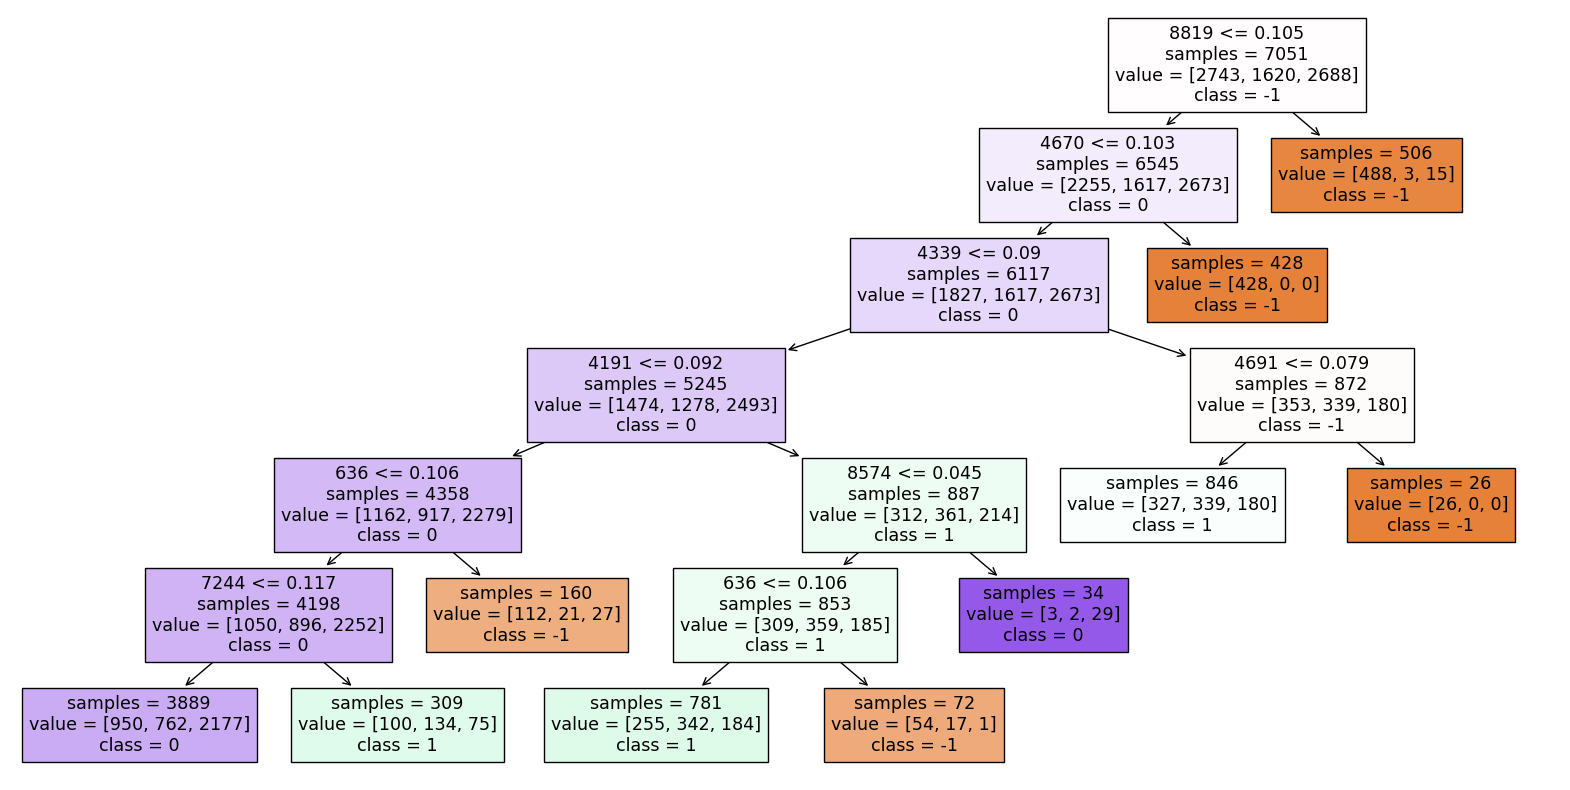

In [67]:
from sklearn import tree
import matplotlib.pyplot as plt

# Check if features match the trained model
features = X_train.columns if hasattr(X_train, 'columns') else list(range(X_train.shape[1]))
class_names = list(df['sentiment_label'].unique().astype(str))

fig = plt.figure(figsize=(20, 10))  # Set a proper figure size

tree.plot_tree(grid_tree.best_estimator_, 
               feature_names=features,  # Specify feature names
               class_names=class_names,  # Specify class (Y) names
               filled=True, impurity=False)

plt.show()


### Model 5: GradientBoostingClassifier

A Gradient Boosting Classifier is an ensemble learning technique that combines multiple weak learners (usually decision trees) into a strong classifier. Each new tree corrects the errors made by the previous ones, which helps to improve the model's performance iteratively. Gradient Boosting is popular for its ability to produce accurate models, especially when dealing with complex datasets.

**Key reasons to use Gradient Boosting**

- High Accuracy
- Flexibility
- Handles Non-Linear Data
- Reduced Overfitting

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_GB = GradientBoostingClassifier()
classifier_GB.fit(X_train, y_train)
GB_prediction = classifier_GB.predict(X_test)
GB_score=classifier_GB.score(X_test, y_test)
# Model fit and accuracy
print('Accuracy of Gradient Boosting Classifier on training set: {:.2f}'.format(classifier_GB.score(X_train, y_train)))
print('Accuracy of Gradient Boosting Classifier on test set:     {:.2f}'.format(classifier_GB.score(X_test, y_test)))
#Mean Squared Error
GB_mse = mean_squared_error(y_test, GB_prediction)
print(GB_mse)

Accuracy of Gradient Boosting Classifier on training set: 0.78
Accuracy of Gradient Boosting Classifier on test set:     0.73
0.5744540039708802


In [71]:
accuracy = accuracy_score(y_test, GB_prediction)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, GB_prediction))

Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

          -1       0.86      0.67      0.76      1119
           0       0.69      0.55      0.61       729
           1       0.67      0.90      0.77      1174

    accuracy                           0.73      3022
   macro avg       0.74      0.71      0.71      3022
weighted avg       0.75      0.73      0.73      3022



In [73]:
#Confusion Matrix
GB_cm = confusion_matrix(y_test, GB_prediction, labels=[-1, 0, 1])
GB_cm

array([[ 753,  113,  253],
       [  65,  401,  263],
       [  54,   67, 1053]], dtype=int64)

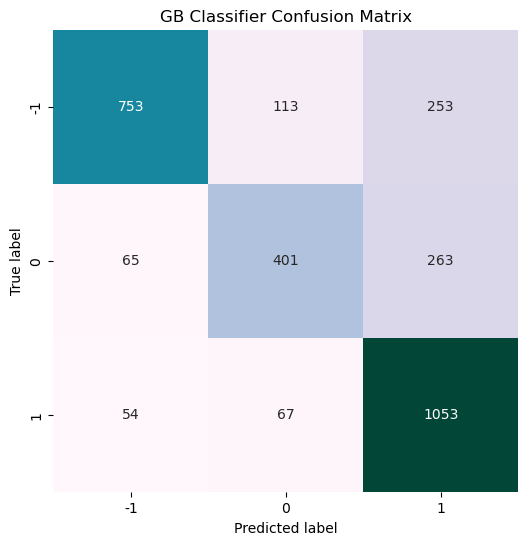

In [75]:
# Plot heatmap with correct labels
plt.figure(figsize=(6,6))
plt.title("GB Classifier Confusion Matrix")
sns.heatmap(GB_cm, annot=True, cmap="PuBuGn", fmt="d", cbar=False, xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## Model 6: Logistic Regression 

In [77]:
# Step 1: Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Step 2: Define the parameter grid for tuning
param_grid = {
    'penalty': ['l2'],  # L2 regularization is supported by lbfgs solver
    'C': [0.1, 1.0, 10],  # Inverse regularization strength
    'solver': ['lbfgs'],  # Use a solver that supports L2 penalty
    'max_iter': [1000]
}

# Step 3: Perform Grid Search with Cross-Validation for Logistic Regression
grid_search_lr = GridSearchCV(log_reg_model, param_grid, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)  # Fitting the model

# Step 4: Make predictions on the test set
log_reg_predictions = grid_search_lr.best_estimator_.predict(X_test)


In [79]:
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
print(f"Accuracy: {log_reg_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, log_reg_predictions))


Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

          -1       0.88      0.80      0.84      1119
           0       0.74      0.75      0.75       729
           1       0.88      0.94      0.91      1174

    accuracy                           0.84      3022
   macro avg       0.83      0.83      0.83      3022
weighted avg       0.84      0.84      0.84      3022



In [81]:
LOGR_cm = confusion_matrix(y_test, log_reg_predictions, labels=[-1, 0, 1])
LOGR_cm

array([[ 894,  157,   68],
       [  92,  548,   89],
       [  35,   37, 1102]], dtype=int64)

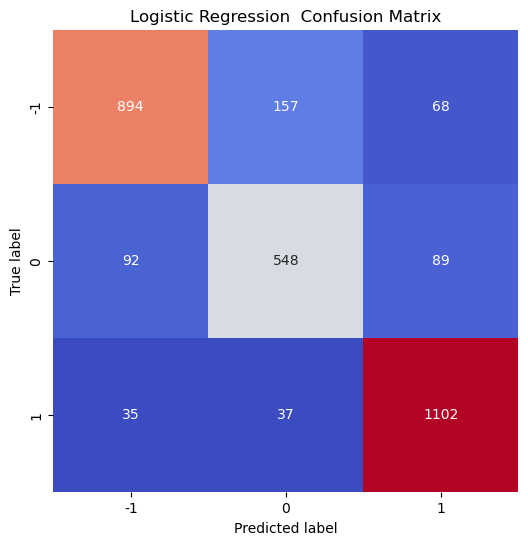

In [83]:
# Plot heatmap with correct labels
plt.figure(figsize=(6,6))
plt.title("Logistic Regression  Confusion Matrix")
sns.heatmap(LOGR_cm, annot=True, cmap="coolwarm", fmt="d", cbar=False, xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [85]:
# Step 1: Ensure vectorization is done correctly (this step remains the same)
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=5, stop_words='english')  # Example vectorizer settings
X_vectorized = vectorizer.fit_transform(df['text_cleaned'])  # Fitting vectorizer to cleaned text data
feature_names = vectorizer.get_feature_names_out()

# Step 2: Get the coefficients from the fitted Logistic Regression model
log_reg_model = grid_search_lr.best_estimator_  # Using the best Logistic Regression model from GridSearch
coefficients = log_reg_model.coef_[0]  # Coefficients for the features (for class 1)

# Step 3: Zip the feature names with their corresponding coefficients
feature_coefficient_pairs = zip(feature_names, coefficients)

# Step 4: Sort the features by their coefficient values (in descending order)
sorted_features = sorted(feature_coefficient_pairs, key=lambda x: x[1], reverse=True)

# Step 5: Extract the top 20 positive features
top_positive_features = sorted_features[:20]

# Step 6: Display the top 20 positive features with their coefficient values
print("Top positive features:")
for feature, score in top_positive_features:
    print(f"{feature}: {score}")


Top positive features:
iranbacked: 7.89919452506315
passed: 6.951149089389756
produced: 6.663120071135899
chest: 5.861681278043083
israel attacks: 5.776405684658497
journey: 5.734485626974984
pm say: 5.379716762023454
definition: 4.782927640038698
people taken: 4.281297026650681
staffer: 4.2134058606464775
cnn christiane: 3.89370333330817
better: 3.849227098582795
displaced: 3.599186011933712
accountable: 3.5856493330763026
journalists killed: 3.5568880937861955
decided: 3.4356967932453393
heard: 3.3900127708892023
tuba: 3.3042051221346793
page: 3.266275670743221
threatens: 3.203196340417582


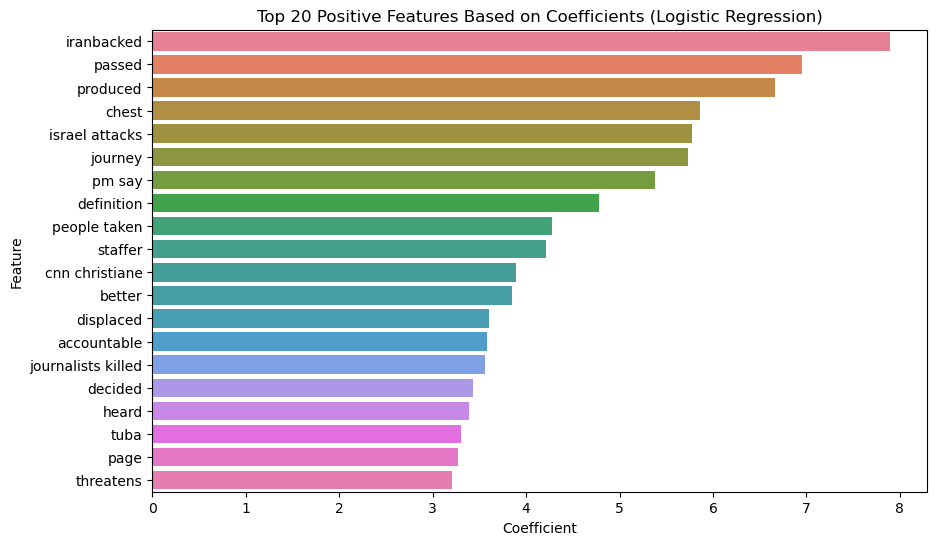

In [87]:
df_top_features = pd.DataFrame(top_positive_features, columns=['Feature', 'Coefficient'])  # Use 'Coefficient' instead of 'Log Probability'

# Create a bar plot for the top positive features
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=df_top_features, hue='Feature', dodge=False, legend=False)

# Add plot details
plt.title('Top 20 Positive Features Based on Coefficients (Logistic Regression)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')

# Show the plot
plt.show()


## Model 7: Random Forest

In [89]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
}

# Perform Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search_rf.best_estimator_

# Train the best model
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Print evaluation results
print("Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Accuracy: 0.8375248180013236
Confusion Matrix:
 [[ 941  144   34]
 [ 211  502   16]
 [  40   46 1088]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.79      0.84      0.81      1119
           0       0.73      0.69      0.71       729
           1       0.96      0.93      0.94      1174

    accuracy                           0.84      3022
   macro avg       0.82      0.82      0.82      3022
weighted avg       0.84      0.84      0.84      3022



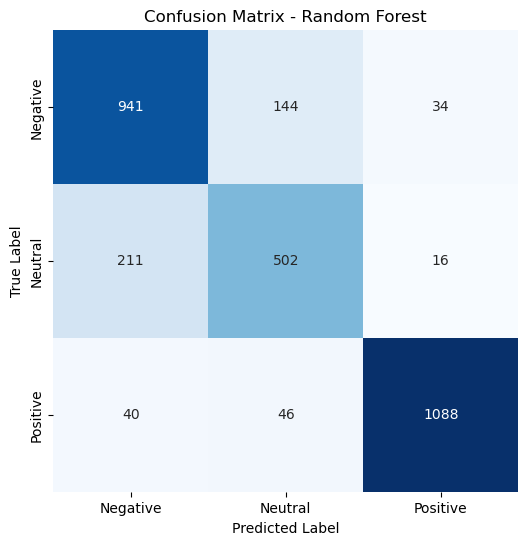

In [91]:
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [95]:
# Assuming the best_rf_model is your trained Random Forest model
feature_importances = best_rf_model.feature_importances_  # Get feature importances

# Ensure that the number of features in both the vectorizer and the model match
if len(feature_names) != len(feature_importances):
    print(f"Warning: Mismatch in feature length! TF-IDF vectorizer: {len(feature_names)}, RandomForest: {len(feature_importances)}")

    # Align the feature names with the number of features used by the model
    min_length = min(len(feature_names), len(feature_importances))
    feature_names = feature_names[:min_length]
    feature_importances = feature_importances[:min_length]

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top 20 important features
top_important_features = importance_df.head(20)
top_important_features


,Feature,Importance
3131,refuse,0.009012
636,chest,0.005162
3483,shore,0.003869
3668,strip israel,0.002266
2945,prevent,0.002262
3422,sentence,0.002232
1433,free speech,0.002139
1940,israel attacks,0.002082
1890,international criminal,0.002063
742,commission,0.001984


<Figure size 1000x800 with 0 Axes>

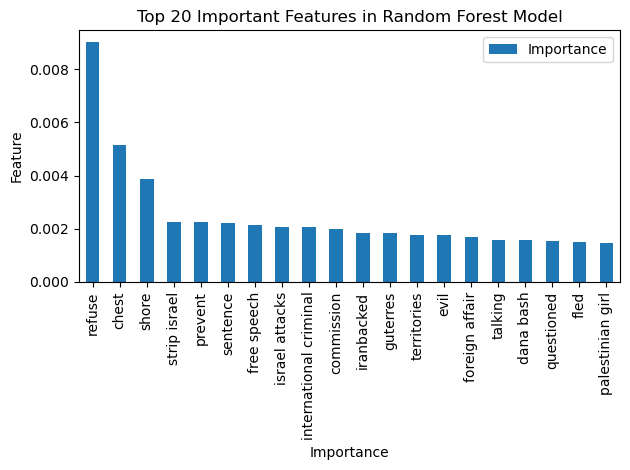

In [97]:
# Plot feature importances
plt.figure(figsize=(10, 8))
top_important_features.plot(kind='bar', x='Feature', y='Importance')
plt.title('Top 20 Important Features in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

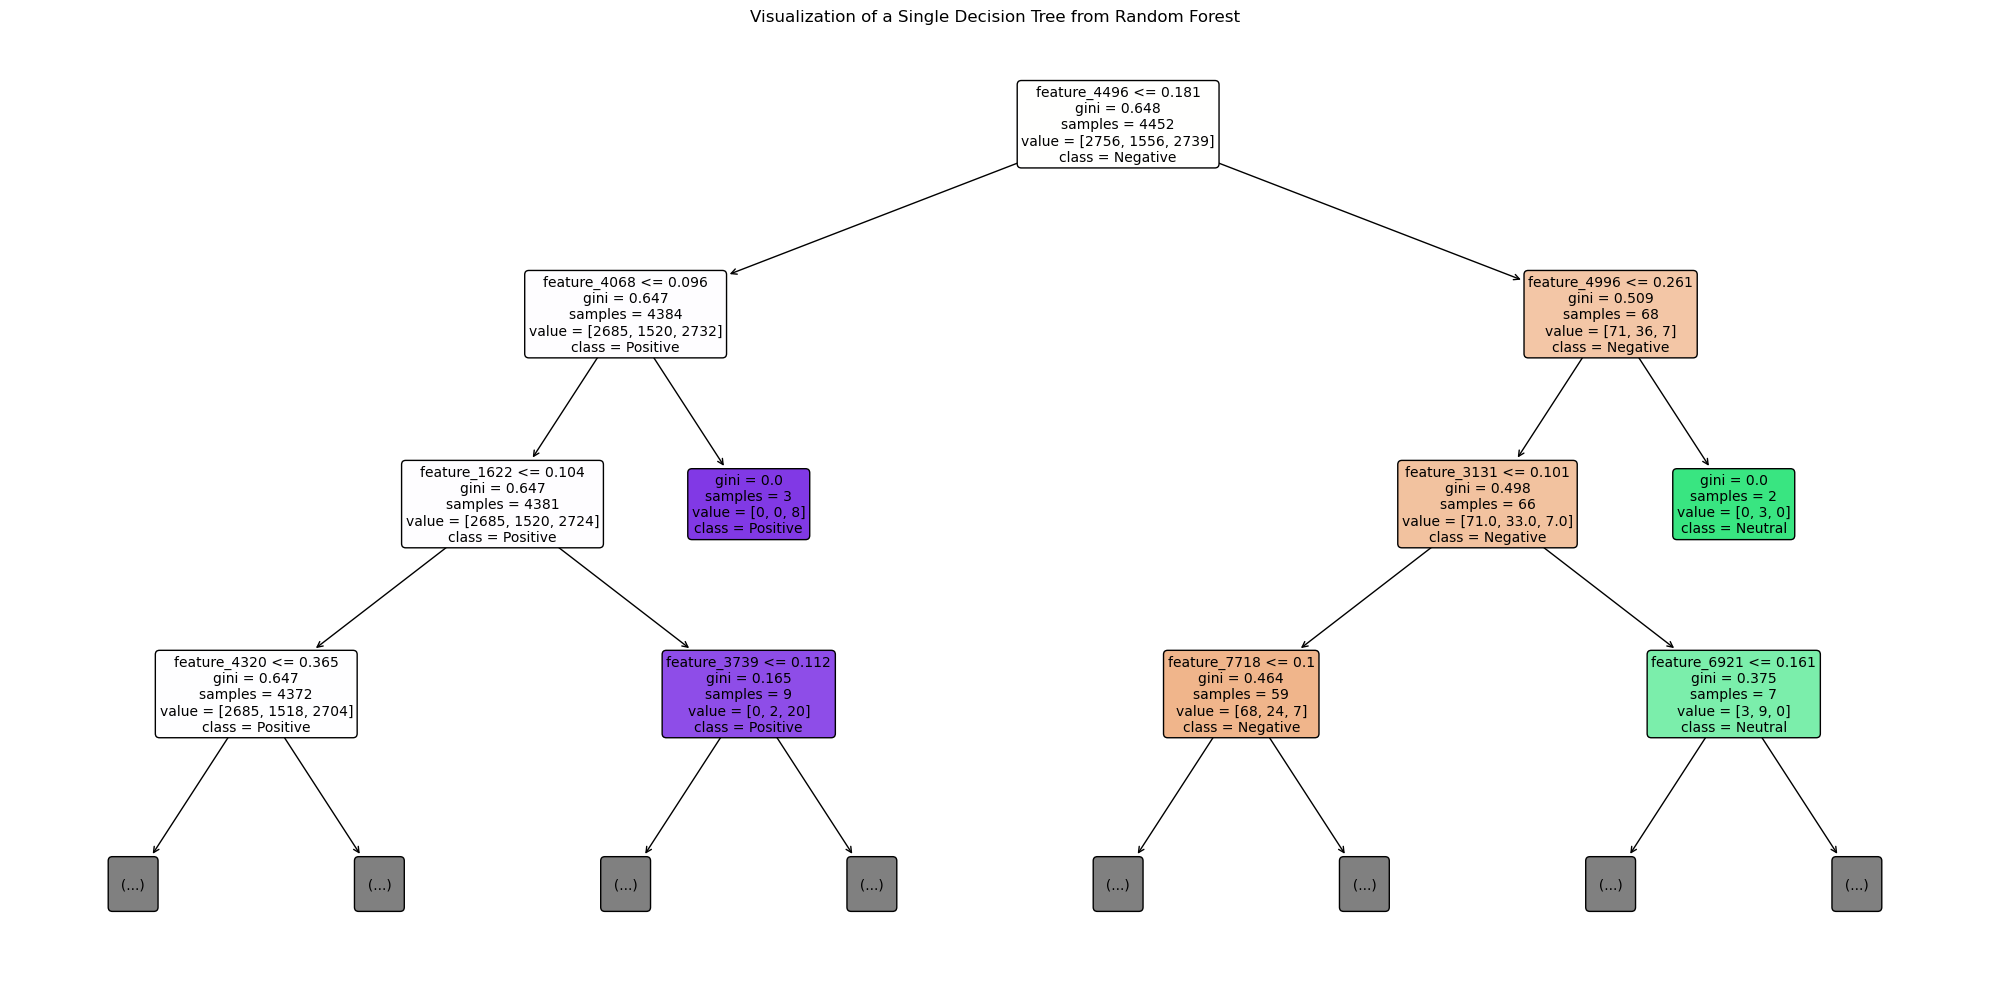

In [99]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get the number of features in the model
n_features = best_rf_model.n_features_in_

# Create generic feature names
feature_names = [f'feature_{i}' for i in range(n_features)]

# Get a single tree from the forest
tree_to_visualize = best_rf_model.estimators_[0]

# Create a large figure for better readability
plt.figure(figsize=(20,10))

# Plot the tree
plot_tree(tree_to_visualize, 
          feature_names=feature_names, 
          class_names=['Negative', 'Neutral', 'Positive'],  # Adjust these based on your actual class labels
          filled=True, 
          rounded=True, 
          fontsize=10,
          max_depth=3)  # Limit depth to make the tree more manageable

plt.title("Visualization of a Single Decision Tree from Random Forest")
plt.tight_layout()
plt.show()

# If you want to save the image instead of displaying it
# plt.savefig('random_forest_single_tree.png', dpi=300, bbox_inches='tight')

## Model Performance Comparison

In [101]:
# Function to retrieve precision, recall, f1-score for each class, and macro/weighted averages
def get_classification_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    accuracy = accuracy_score(y_true, y_pred)
    
    metrics = {
        "Accuracy": accuracy,
        "Class -1 Precision": report["-1"]["precision"],
        "Class -1 Recall": report["-1"]["recall"],
        "Class -1 F1": report["-1"]["f1-score"],
        "Class 0 Precision": report["0"]["precision"],
        "Class 0 Recall": report["0"]["recall"],
        "Class 0 F1": report["0"]["f1-score"],
        "Class 1 Precision": report["1"]["precision"],
        "Class 1 Recall": report["1"]["recall"],
        "Class 1 F1": report["1"]["f1-score"],
        "Macro Avg F1": report["macro avg"]["f1-score"],
        "Weighted Avg F1": report["weighted avg"]["f1-score"]
    }
    
    return metrics

# Define model names and corresponding predictions
models = {
    "K-Nearest Neighbors (KNN)": knn_prediction,
    "Support Vector Classifier (SVC)": svc_prediction,
    "Decision Tree (DT)": DT_prediction,
    "Gradient Boosting (GB)": GB_prediction,
    "Naive Bayes (MultinomialNB)": y_pred_nb, 
    "Logistic Regression (LR)": log_reg_predictions,
    "Random Forest (RF)": y_pred_rf 
}

# Assuming y_test is your actual test labels
metrics_data = []
for model_name, predictions in models.items():
    metrics = get_classification_metrics(y_test, predictions)
    metrics["Model"] = model_name
    metrics_data.append(metrics)

# Create a DataFrame for the metrics
df_performance = pd.DataFrame(metrics_data)

# Re-arrange the columns to put 'Model' first
df_performance = df_performance[['Model'] + [col for col in df_performance.columns if col != 'Model']]

# Display the table using pandas
df_performance


,Model,Accuracy,Class -1 Precision,Class -1 Recall,Class -1 F1,Class 0 Precision,Class 0 Recall,Class 0 F1,Class 1 Precision,Class 1 Recall,Class 1 F1,Macro Avg F1,Weighted Avg F1
0,K-Nearest Neighbors (KNN),0.418597,0.785714,0.029491,0.056848,0.292464,0.984911,0.451005,0.979048,0.437819,0.605062,0.370971,0.364903
1,Support Vector Classifier (SVC),0.834216,0.776800,0.867739,0.819755,0.774300,0.644719,0.703593,0.927039,0.919932,0.923472,0.815607,0.832025
2,Decision Tree (DT),0.761747,0.763507,0.669348,0.713333,0.617687,0.622771,0.620219,0.841501,0.936116,0.886290,0.739947,0.758062
3,Gradient Boosting (GB),0.730311,0.863532,0.672922,0.756404,0.690189,0.550069,0.612214,0.671128,0.896934,0.767773,0.712130,0.726037
4,Naive Bayes (MultinomialNB),0.747187,0.676890,0.848079,0.752876,0.690619,0.474623,0.562602,0.860590,0.820273,0.839948,0.718475,0.740802
5,Logistic Regression (LR),0.841827,0.875612,0.798928,0.835514,0.738544,0.751715,0.745071,0.875298,0.938671,0.905878,0.828821,0.841032
6,Random Forest (RF),0.837525,0.789430,0.840929,0.814366,0.725434,0.688615,0.706545,0.956063,0.926746,0.941176,0.820696,0.837620


## Summary
- **Best Overall Model:** **Logistic Regression** emerges as the best performer, offering high accuracy and strong performance across all sentiment classes, especially for both negative and positive sentiments.

- **Naive Bayes (MultinomialNB):** This model shows a balanced performance between precision and recall for all sentiment types. It is particularly effective at identifying neutral sentiment, making it a good option when neutrality is a priority.

- **Random Forest:** This model delivers balanced results across all sentiment types, with strong recall for positive sentiment, making it a reliable choice for scenarios where identifying different sentiments is crucial.

- **Support Vector Classifier (SVC):** SVC is one of the top models, excelling in classifying both negative and positive sentiments, making it a robust choice for balanced sentiment classification.

- **Gradient Boosting:** While it doesn’t have the highest overall accuracy, Gradient Boosting shines in classifying negative sentiments with high precision, making it useful when accuracy in negative sentiment is essential.

- **Decision Tree:** The Decision Tree model provides a good balance of performance and interpretability, especially for positive sentiment classification.

- **K-Nearest Neighbors (KNN):** KNN struggles with certain sentiment types but can still be useful for simpler datasets or when computational resources are limited.


